In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

# Pretraitement des données

In [4]:
data = pd.read_csv("house.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data['bathrooms'] = data['bathrooms'].map(lambda x: int(round(x,0)))
data.info(show_counts = False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             int64  
 1   date           object 
 2   price          float64
 3   bedrooms       int64  
 4   bathrooms      int64  
 5   sqft_living    int64  
 6   sqft_lot       int64  
 7   floors         float64
 8   waterfront     int64  
 9   view           int64  
 10  condition      int64  
 11  grade          int64  
 12  sqft_above     int64  
 13  sqft_basement  int64  
 14  yr_built       int64  
 15  yr_renovated   int64  
 16  zipcode        int64  
 17  lat            float64
 18  long           float64
 19  sqft_living15  int64  
 20  sqft_lot15     int64  
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.058715,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.755524,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,2.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Change la date en objet DateTime

In [8]:
def  change_to_datetime ( data ):  
    data [ 'date' ]  =  pd . to_datetime ( data [ 'date' ]) 
    return  data
change_to_datetime ( data )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,1,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,2,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [10]:
duplicates = data[data.duplicated(subset=['id'])]
print(len(duplicates))

177


## Visualisation des données

## Visualiser yr_renovated apres 1900 

Text(0.5, 1.0, 'Distribution of year renovated feature')

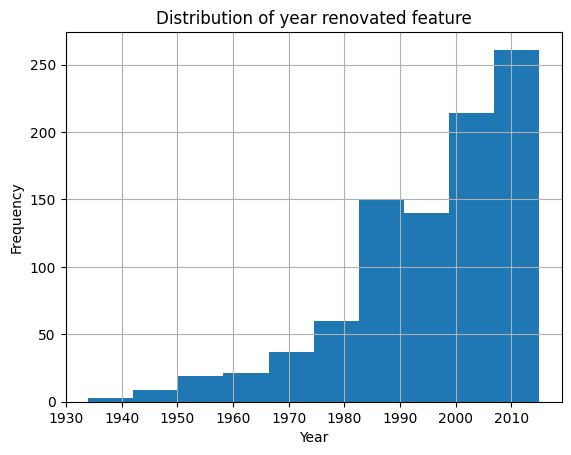

In [11]:
data[data['yr_renovated'] > 1900]['yr_renovated'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of year renovated feature")

#### la majeur partie des maisons a été rénové en 2010

## Visualisez la distribution yr_built 

Text(0.5, 1.0, "Distribution de l'année de construction")

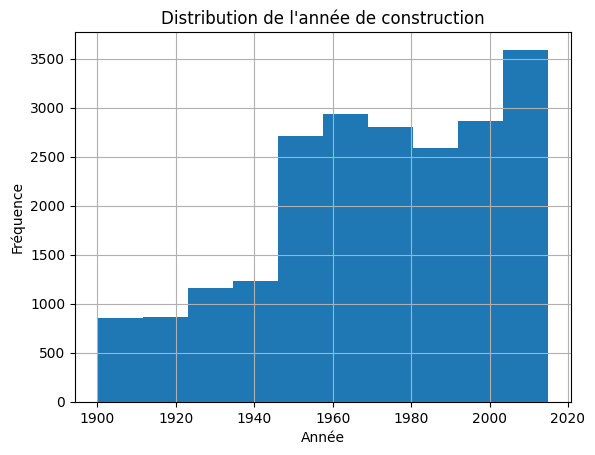

In [12]:
data[ 'yr_built' ] . hist () 
plt . xlabel ( 'Année' ) 
plt . ylabel ( 'Fréquence' ) 
plt . title ( "Distribution de l'année de construction" ) 

#### la majeure partie des maison on été construit aprés 2000

## visualiser la distrubition des prix

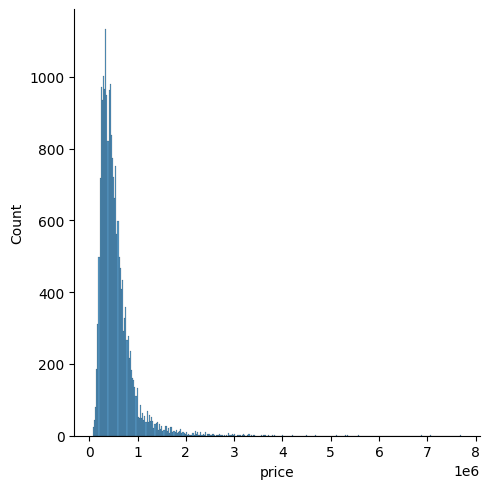

In [13]:
sns.displot(data["price"])

## La correlation entre les chambres et le prix

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

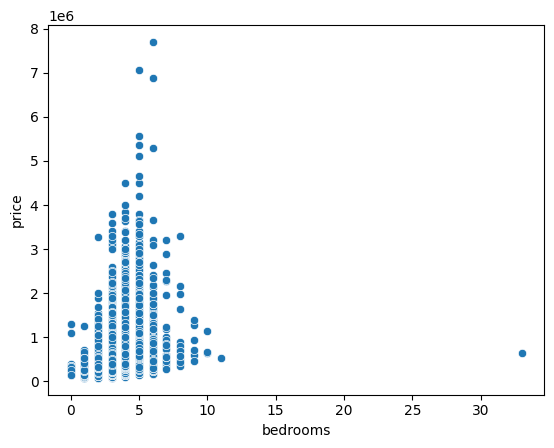

In [14]:
sns.scatterplot(data=data, x="bedrooms",y="price")


## Correlation entre grade et prix

<AxesSubplot:xlabel='grade', ylabel='price'>

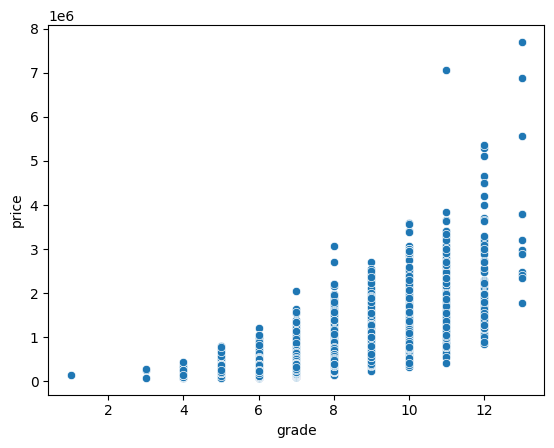

In [15]:
sns.scatterplot(data=data, x="grade",y="price")

#### plus le grade est élevé plus la maison est cher

<AxesSubplot:xlabel='floors', ylabel='count'>

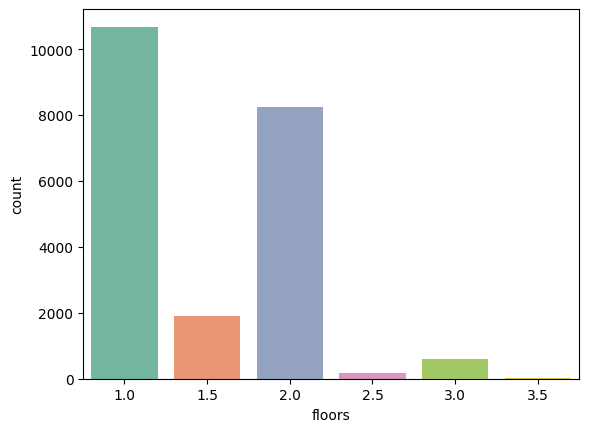

In [16]:
sns.countplot(data=data,x="floors",palette = "Set2")

## Price vs Living space

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

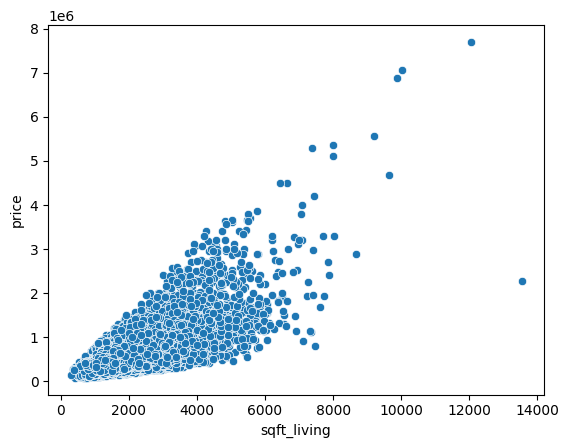

In [17]:
sns.scatterplot(data = data, x="sqft_living",y="price")

#### plus la maison est spacieuse plus elle est couteuse

## Price vs waterfront

<AxesSubplot:xlabel='waterfront', ylabel='price'>

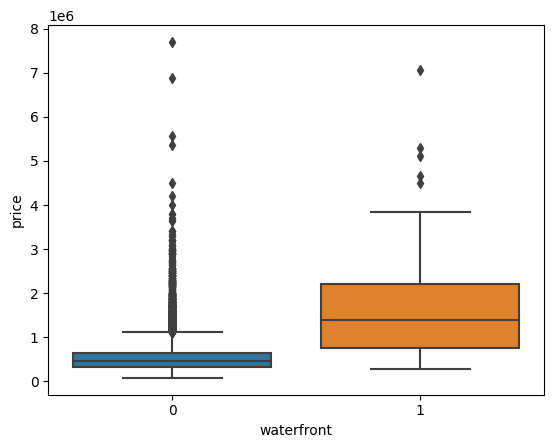

In [18]:
sns.boxplot(data=data, x="waterfront",y="price")

<AxesSubplot:xlabel='long', ylabel='lat'>

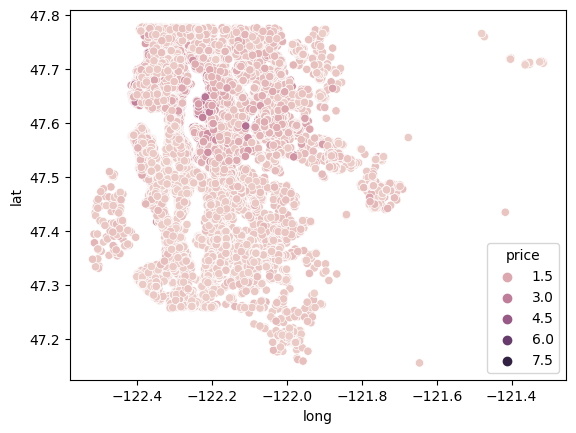

In [19]:
sns.scatterplot(data = data, x="long",y="lat",hue="price")

In [20]:
data = data.drop(columns = ["id","date","zipcode"], axis=1)


In [21]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## Les fonctionnalités les plus importantes pour predir le prix sont :bedrooms	bathrooms	sqft_living	sqft_lot	floors	waterfront	view	condition	grade	sqft_above	sqft_basement	yr_built	yr_renovated	lat	long	sqft_living15	sqft_lot15

## split data


In [22]:
X = np.array(data["sqft_living"]).reshape(-1,1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 4)

## regression lineaire

In [23]:
lm = LinearRegression()
#train using trainning sets
lm.fit(X_train, y_train)


LinearRegression()

In [24]:
y_pred=lm.predict(X_test)


In [25]:
print(len(X))
print(len(y))
print(len(lm.predict(X)))
print(X.size)
print(y.size)


21613
21613
21613
21613
21613


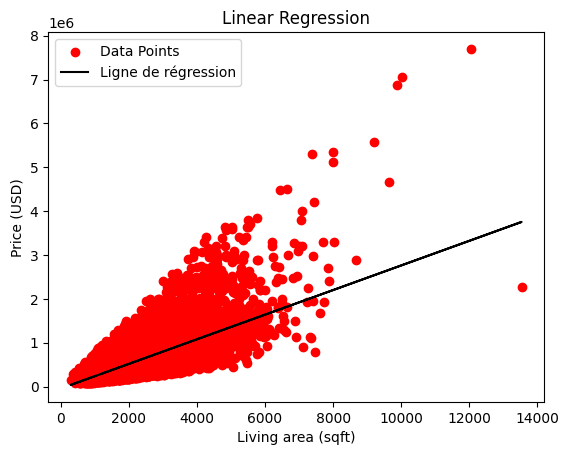

In [26]:
plt.scatter(X,y,color="r",label  =  'Data Points')
plt.title("Linear Regression")
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.plot(X,lm.predict(X),color="k", label  =  'Ligne de régression')
plt.legend()

## visualiser la diff entre les prix actuel et les prix predit

Text(0.5, 1.0, 'price vs price predicted')

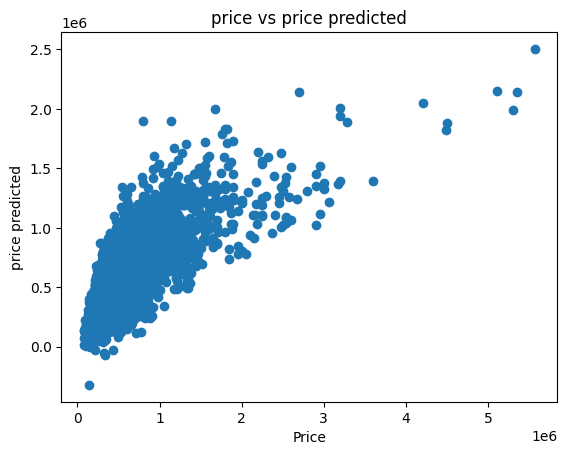

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel("Price")
plt.ylabel("price predicted")
plt.title("price vs price predicted")

## les performances de la régression linéaire 

In [34]:
print("MSE", mean_squared_error(y_test,y_pred))
print("R squared", metrics.r2_score(y_test,y_pred))

MSE 69274037103.69914
R squared 0.48583970219479355


##  la régression linéaire multiple

In [40]:
X = data[["sqft_living","bedrooms","bathrooms","grade"]]
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 4)

In [41]:
lm = LinearRegression()
#train using trainning sets
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred=lm.predict(X_test)

## les performances de la régression multi-linéaire

In [43]:
print("MSE", mean_squared_error(y_test,y_pred))
print("R squared", metrics.r2_score(y_test,y_pred))

MSE 62464980813.38865
R squared 0.5363773430826452


## Nous remarquons que la regression multi_linear est plus efficace que la regression lineaire pour predire la variable de sortie 
# r_squared linear = 48%
# r_squared multi-linear = 53%

## La regression polynomiale

In [54]:
X = data[["sqft_living","bedrooms","bathrooms","grade"]]
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 4)

In [55]:
poly=PolynomialFeatures(degree=3)
X_train_fit = poly.fit_transform(X_train)

In [56]:
lm = LinearRegression()
lm.fit(X_train_fit, y_train)

LinearRegression()

In [57]:
X_test_ = poly.fit_transform(X_test)
y_pred=lm.predict(X_test_)

## Les performances de la régression polynomiale

In [60]:
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("R squared: ", metrics.r2_score(y_test,y_pred))

MSE:  53463135897.585785
R squared:  0.6031901268644977


## Nous remarquons que la regression polynomiale est plus efficace que la regression multi-lineaire qui est plus efficace que la regression polynomiale pour predire la variable de sortie¶
## r_squared linear = 48%
## r_squared multi-linear = 53%
## r_squared polynomial = 60%